In [15]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils

In [16]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
path = '/content/drive/MyDrive/Test_OpenCV'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['Model', 'img_240.jpg', 'img_280.jpg', 'img_340.jpg', 'img_200.jpg']

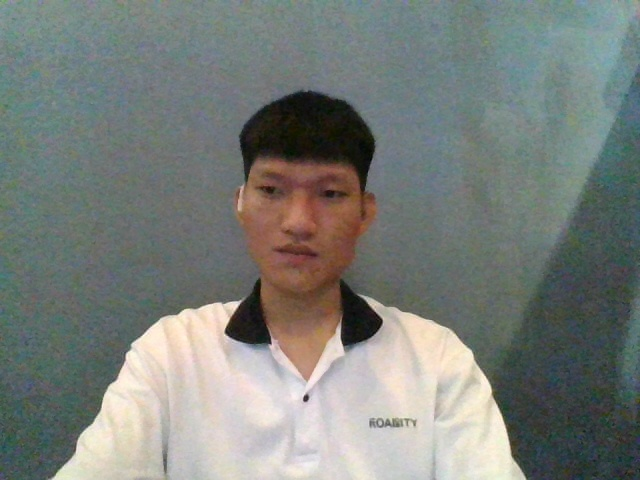

In [18]:
img = cv2.imread(path + "/img_280.jpg")
cv2_imshow(img)

In [23]:
face_landmarks_model_path = path+ "/Model/shape_predictor_68_face_landmarks.dat"
print(face_landmarks_model_path)
face_recognition_model_path = path+ "/Model/dlib_face_recognition_resnet_model_v1.dat"
print(face_recognition_model_path)
img_path = path+  "/img_280.jpg"
print(img_path)

/content/drive/MyDrive/Test_OpenCV/Model/shape_predictor_68_face_landmarks.dat
/content/drive/MyDrive/Test_OpenCV/Model/dlib_face_recognition_resnet_model_v1.dat
/content/drive/MyDrive/Test_OpenCV/img_280.jpg


-0.166146
0.155359
0.0403345
-0.091511
-0.113697
-0.0873589
-0.0456137
-0.161276
0.135558
-0.107853
0.194072
0.0205137
-0.215313
-0.139418
-0.040462
0.16682
-0.116625
-0.178566
-0.0915703
-0.0211229
0.115634
0.0668937
0.0319409
0.0141397
-0.0682374
-0.2573
-0.077178
0.0131533
0.0288042
-0.031612
-0.013823
0.0606664
-0.226204
-0.108646
0.0377562
0.170486
-0.0297556
-0.0278462
0.169032
-0.0260006
-0.244926
0.050677
0.0751219
0.259882
0.221563
0.0159565
0.0126789
-0.1522
0.111894
-0.148135
0.043814
0.152675
0.10031
0.0613985
0.00452408
-0.16819
0.0641223
0.10305
-0.151059
-0.0441925
0.148384
-0.142248
-0.0885188
-0.115817
0.163581
0.0414064
-0.117788
-0.191228
0.100789
-0.139393
-0.0904401
0.0984512
-0.162605
-0.10962
-0.326361
0.0133178
0.378667
0.119072
-0.146696
0.0798743
-0.00935817
0.0643855
0.0866779
0.108629
-0.0654943
0.0636093
-0.0986011
0.0466735
0.163628
-0.0142969
-0.0716106
0.185545
0.0548828
0.0937518
0.0512635
0.0408275
-0.0163067
0.00691382
-0.143107
0.0212624
0.0408538
-0

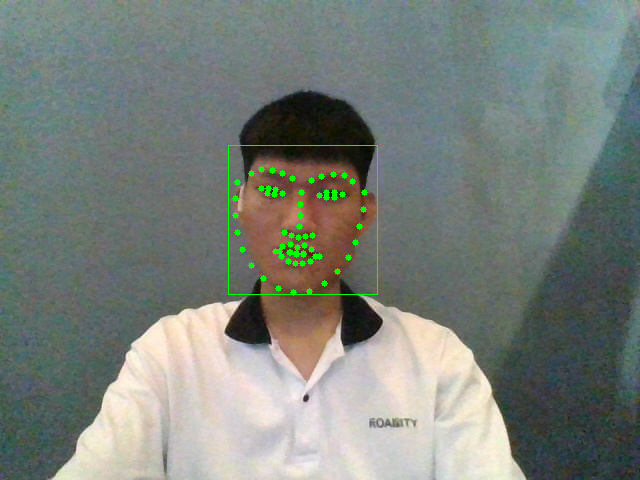

In [24]:
face_landmarks_model_path = path+ "/Model/shape_predictor_68_face_landmarks.dat"
face_recognition_model_path = path+ "/Model/dlib_face_recognition_resnet_model_v1.dat"
img_path = path+  "/img_280.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

     # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

     # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)